# **Unsupervised Learning and Optimization**

## **Mapping clustering to discrete optimization**

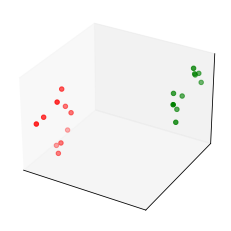

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

n_instances = 20
class_1 = np.random.rand(n_instances//2, 3)/10
class_2 = (0.6, 0.1, 0.05) + np.random.rand(n_instances//2, 3)/10
data = np.concatenate((class_1, class_2))
colors = ["red"] * (n_instances//2) + ["green"] * (n_instances//2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xticks=[], yticks=[], zticks=[])
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors);

The high-dimensional space is endowed with some measure of distance, the Euclidean distance being the simplest case. We can calculate all pairwise distances between the data points:

In [2]:
import itertools
d = np.zeros((n_instances, n_instances))
for i, j in itertools.product(*[range(n_instances)]*2):
    d[i, j] = np.linalg.norm(data[i]-data[j])

print("The distances are ", d)

The distances are  [[0.         0.10176638 0.07243951 0.06156429 0.03530039 0.08224355
  0.05600741 0.06674033 0.08266962 0.09890993 0.58341988 0.64482256
  0.57175168 0.61497965 0.62961183 0.6392775  0.58823317 0.64929519
  0.64921501 0.64676487]
 [0.10176638 0.         0.04874113 0.07316072 0.11510522 0.04784958
  0.05038226 0.08691878 0.06082393 0.06863094 0.53927553 0.59208029
  0.52373626 0.57081807 0.58267415 0.59406114 0.54376596 0.60590442
  0.59938283 0.59865802]
 [0.07243951 0.04874113 0.         0.04880784 0.09592885 0.05940012
  0.03610055 0.06478279 0.08107962 0.09448569 0.52507099 0.58305729
  0.51142181 0.55628106 0.57049351 0.58017209 0.52953432 0.5911275
  0.58808691 0.58641746]
 [0.06156429 0.07316072 0.04880784 0.         0.06882548 0.0871782
  0.05907649 0.01614012 0.07578325 0.083256   0.54313267 0.60074567
  0.53142493 0.57849039 0.58656482 0.60223615 0.54931247 0.61216009
  0.6102626  0.60811954]
 [0.03530039 0.11510522 0.09592885 0.06882548 0.         0.09981721

This matrix is sometimes called the Gram or the kernel matrix. The Gram matrix contains a fair bit of information about the topology of the points in the high-dimensional space, but it is not easy to see. We can think of the Gram matrix as the weighted adjacency matrix of a graph: two nodes represent two data instances. Their distance as contained in the Gram matrix is the weight on the edge that connects them. If the distance is zero, they are not connected by an edge. In general, this is a dense graph with many edges -- sparsity can be improved by a distance function that gets exponentially smaller.

What can we do with this graph to find the clusters? We could look for the max-cut, that is, the collection of edges that would split the graph in exactly two if removed, while maximizing the total weight of these edges [[1](#1)]. This is a well-known NP-hard problem, but it also very naturally maps to an Ising model.

# **References**

[1] Otterbach, J. S., Manenti, R., Alidoust, N., Bestwick, A., Block, M., Bloom, B., Caldwell, S., Didier, N., Fried, E. Schuyler, Hong, S., Karalekas, P., Osborn, C. B., Papageorge, A., Peterson, E. C., Prawiroatmodjo, G., Rubin, N., Ryan, Colm A., Scarabelli, D., Scheer, M., Sete, E. A., Sivarajah, P., Smith, Robert S., Staley, A., Tezak, N., Zeng, W. J., Hudson, A., Johnson, Blake R., Reagor, M., Silva, M. P. da, Rigetti, C. (2017). [Unsupervised Machine Learning on a Hybrid Quantum Computer](https://arxiv.org/abs/1712.05771). *arXiv:1712.05771*. <a id='1'></a>